# IMPORTING LIBRARIES

In [61]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import pandas as pd
import nltk
import networkx as nx

In [96]:
df = pd.read_csv('/root/Desktop/TASK.csv')

In [97]:
df.head()

,TEST DATASET,Unnamed: 1
0,NaN,Introduction
1,NaN,Acnesol Gel is an antibiotic that fights bacte...
2,NaN,Ambrodil Syrup is used for treating various re...
3,NaN,Augmentin 625 Duo Tablet is a penicillin-type ...
4,NaN,Azithral 500 Tablet is an antibiotic used to t...


In [98]:
df.isnull().sum()

TEST DATASET    1001
Unnamed: 1         0
dtype: int64

In [102]:
df = pd.pivot_table(df , 'TEST DATA' , 'Unnamed')

In [103]:
df

""
Unnamed


In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# FLOW OF THE PROGRAM THAT IS CREATED

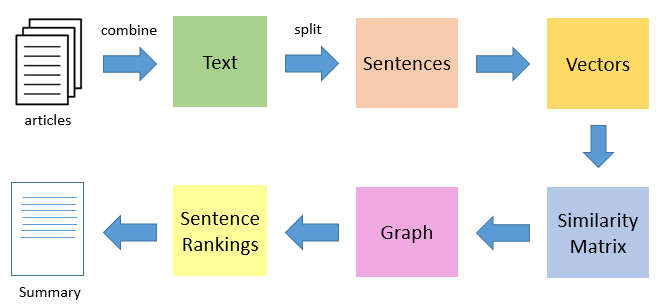

# Generate clean sentence

In [65]:
def read_article(sample):
    file = open(sample, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences


# Sentence Similarity and Vectors

In [66]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

# Similarity Matrix

In [67]:
 def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

# Graph and Sentence Ranking

In [72]:
def generate_summary(sample, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(sample)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))


# Summary

In [73]:
# let's begin
generate_summary( "sample", 2)

Acnesol Gel is an antibiotic that fights bacteria
It is used to treat acne, which appears as spots or pimples on your face, chest or back
This medicine works by attacking the bacteria that cause these pimples.Acnesol Gel is only meant for external use and should be used as advised by your doctor
You should normally wash and dry the affected area before applying a thin layer of the medicine
It should not be applied to broken or damaged skin
Avoid any contact with your eyes, nose, or mouth
Rinse it off with water if you accidentally get it in these areas
It may take several weeks for your symptoms to improve, but you should keep using this medicine regularly
Do not stop using it as soon as your acne starts to get better
Ask your doctor when you should stop treatment.Common side effects like minor itching, burning, or redness of the skin and oily skin may be seen in some people
These are usually temporary and resolve on their own
Consult your doctor if they bother you or do not go away.It